In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Loading dataset into data frame

In [3]:
dataset = pd.read_csv('C:\\Users\\Reethika\\creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Analysis

In [4]:
# Shape of dataset
dataset.shape

(284807, 31)

In [4]:
# Dataset information 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# mathematical values of dataset

dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# finding null values in dataset

dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# distribution of legit transaction and fraudulent transaction

dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Seperating data for analysis
- 0 : Normal transaction
- 1 : Fraudulent transaction

In [9]:
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]

In [10]:
print("Shape of legit : ", legit.shape)
print("Shape of fraud : ", fraud.shape)

Shape of legit :  (284315, 31)
Shape of fraud :  (492, 31)


In [11]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
# fraud transaction description

fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# comparing the values for both transaction 

dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [16]:
legit_sample = dataset.sample(n = 492)

### Under-Sampling
- build a sample dataset having similar distribution of normal and fraudulent transactions.
- number of fraudulent transaction is = 492

#### Concatinating two samplings

In [17]:
new_dataset = pd.concat([legit_sample, fraud], axis = 0) 

In [18]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
44601,42014.0,-3.888588,-3.480963,0.189068,-1.551981,1.861539,-0.603172,-0.235471,0.876005,0.515817,...,0.615757,0.311002,0.339525,-0.898667,0.605742,0.100635,-0.094075,-0.508209,288.08,0
23549,32815.0,-0.337602,-0.004727,0.882829,-1.160874,-0.253615,0.149808,0.303150,0.151973,-1.489376,...,0.108835,0.135665,0.065308,-0.383751,0.032405,-0.312104,0.026586,0.033969,103.84,0
215212,139977.0,-7.189095,-5.008992,-5.245832,-0.685292,-0.238422,0.381533,1.761069,-7.294177,0.194183,...,3.762028,0.475264,0.482190,0.706678,-0.180532,0.196717,3.079452,1.057114,1000.16,0
15409,26794.0,-1.596417,1.438284,0.842365,0.141843,-0.837623,-0.838281,0.021101,0.854586,-0.624441,...,-0.114537,-0.419981,0.143929,0.600956,-0.239657,0.076005,0.200359,-0.014126,49.99,0
22644,32355.0,1.183009,1.354927,-1.450851,1.661738,0.977732,-1.518109,0.791569,-0.341303,-0.665438,...,-0.146889,-0.226449,-0.153613,0.110094,0.784310,-0.288983,0.065237,0.099550,0.75,0


In [19]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [20]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [21]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96655.609756,0.040908,-0.003243,-0.071768,-0.149318,0.057657,0.012264,0.035806,-0.034808,0.026610,...,-0.015415,0.061795,-0.033806,-0.016477,0.015769,-0.048967,0.025716,0.011334,0.004692,90.609146
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Data Visualization

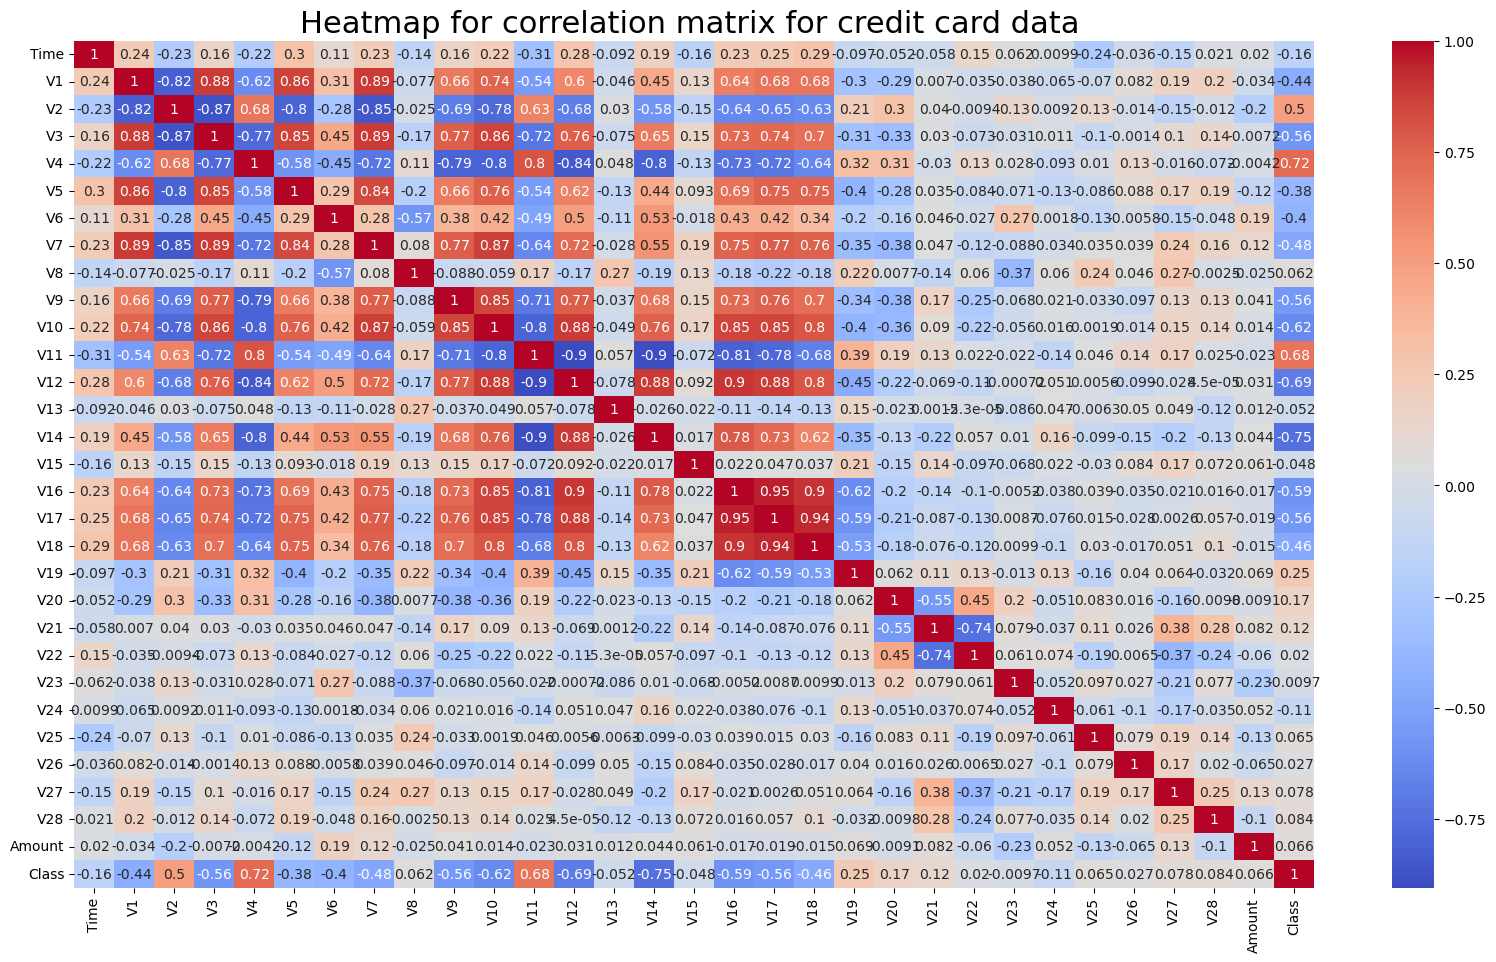

In [22]:
plt.figure(figsize = (20,11))
# heatmap size in ration 16:9

sns.heatmap(new_dataset.corr(), annot = True, cmap = 'coolwarm')
# heatmap parameters

plt.title("Heatmap for correlation matrix for credit card data ", fontsize = 22)
plt.show()

### Splitting the data into features and Targets

In [24]:
X = new_dataset.drop(columns = 'Class', axis = 1)
Y = new_dataset['Class']

In [25]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
44601,42014.0,-3.888588,-3.480963,0.189068,-1.551981,1.861539,-0.603172,-0.235471,0.876005,0.515817,...,1.180905,0.615757,0.311002,0.339525,-0.898667,0.605742,0.100635,-0.094075,-0.508209,288.08
23549,32815.0,-0.337602,-0.004727,0.882829,-1.160874,-0.253615,0.149808,0.303150,0.151973,-1.489376,...,0.358255,0.108835,0.135665,0.065308,-0.383751,0.032405,-0.312104,0.026586,0.033969,103.84
215212,139977.0,-7.189095,-5.008992,-5.245832,-0.685292,-0.238422,0.381533,1.761069,-7.294177,0.194183,...,-7.005531,3.762028,0.475264,0.482190,0.706678,-0.180532,0.196717,3.079452,1.057114,1000.16
15409,26794.0,-1.596417,1.438284,0.842365,0.141843,-0.837623,-0.838281,0.021101,0.854586,-0.624441,...,-0.024772,-0.114537,-0.419981,0.143929,0.600956,-0.239657,0.076005,0.200359,-0.014126,49.99
22644,32355.0,1.183009,1.354927,-1.450851,1.661738,0.977732,-1.518109,0.791569,-0.341303,-0.665438,...,0.002067,-0.146889,-0.226449,-0.153613,0.110094,0.784310,-0.288983,0.065237,0.099550,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [26]:
Y

44601     0
23549     0
215212    0
15409     0
22644     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

### Splitting the data into training and testing data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

In [30]:
print("Shape of X_train ", X_train.shape)
print("Shape of X_test ", X_test.shape)
print("Shape of Y_train ", Y_train.shape)
print("Shape of Y_test ", Y_test.shape)

Shape of X_train  (787, 30)
Shape of X_test  (197, 30)
Shape of Y_train  (787,)
Shape of Y_test  (197,)


## Model Training

In [31]:
# Logistic Regression

lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

C:\Users\Reethika\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [33]:
# Naive-Bayes

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [34]:
# Decision Tree 

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth = 3)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

## Model Evaluation

### Accuracy Score

In [35]:
# Logistic Regression

# accuracy on training data 

X_train_prediction = lr_model.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("Accuracy on Training data ",traning_data_accuracy)



# accuracy on testing data 

X_test_prediction = lr_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("Accuracy on Testing data ",test_data_accuracy)

Accuracy on Training data  0.9491740787801779
Accuracy on Testing data  0.9238578680203046


In [36]:
# KNN

# accuracy on training data 

X_train_prediction = knn_model.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("Accuracy on Training data ",traning_data_accuracy)



# accuracy on testing data 

X_test_prediction = knn_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("Accuracy on Testing data ",test_data_accuracy)

Accuracy on Training data  0.7649301143583227
Accuracy on Testing data  0.6294416243654822


In [37]:
# Naive-Bayes

# accuracy on training data 

X_train_prediction = nb_model.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("Accuracy on Training data ",traning_data_accuracy)



# accuracy on testing data 

X_test_prediction = nb_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("Accuracy on Testing data ",test_data_accuracy)

Accuracy on Training data  0.8678526048284625
Accuracy on Testing data  0.868020304568528


In [38]:
# Decision Tree

# accuracy on training data 

X_train_prediction = dt_model.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("Accuracy on Training data ",traning_data_accuracy)



# accuracy on testing data 

X_test_prediction = dt_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("Accuracy on Testing data ",test_data_accuracy)

Accuracy on Training data  0.9606099110546379
Accuracy on Testing data  0.9238578680203046


#### So we see that Logistic Regression and Decision Tree model give the best Accuracy among all the other models,
#### For our prediction system we are going to use "Logistic Regression" model.

## Prediction System

In [42]:
# taking input the information about the transaction

input_value = input("Enter the transaction details: \n\n")

# Converting it in the required format

elements = input_value.split(",")

float_list = []
for element in elements:
    float_list.append(float(element))
    
transaction_info = np.array(float_list).reshape(1, -1)

pred = lr_model.predict(transaction_info)

print("\n\n")

if pred == [0]:
    print("The transaction is : Legit")
    
else:
    print("The transaction is : Fraudulent")
    
print("\n\n")

Enter the transaction details: 

169141,-0.724628052668182,1.78704638575614,-1.71633231323031,-0.0690679549621164,0.634686021241264,-1.61808148658173,0.90782549078792,0.37760775297163,-0.681575558108609,-1.40137190864925,-1.10363356079775,-0.267107313606401,-0.816074604332486,0.105036636654737,-0.261439392221791,-0.500035686640393,1.31021321212206,0.272357667627685,0.275140405439125,-0.405770212884341,0.299178643960205,0.742150691182642,-0.223547020361302,-0.150050356073641,-0.168911619591966,-0.126616544917737,-0.187866805888968,0.0923899689876027,5.17



The transaction is : Legit



